<a href="https://colab.research.google.com/github/gulendamarici/Netflix-project/blob/main/Musteri_Kaybi_Tahmini_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Veri setinin özet bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import pandas as pd

# Veri setimizi yüklüyoruz.
# Dosya adının 'WA_Fn-UseC_-Telco-Customer-Churn.csv' olduğundan emin ol.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Verinin ilk 5 satırına bakalım
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Sayısal sütunların istatistiksel özeti
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# 'Churn' sütunundaki değerlerin dağılımı
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
import numpy as np

# --- Adım 1: 'TotalCharges' Sütununu Düzeltme ---

# 'object' tipindeki sütunu sayısal 'float' tipine zorla dönüştür.
# errors='coerce' parametresi: Dönüştürme sırasında hata alırsa (örn: " " boşluk görürse)
# o değeri 'NaN' (Not a Number / Eksik Veri) olarak işaretler.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# --- Adım 2: Oluşan Eksik Verileri (NaN) Temizleme ---

# 'TotalCharges' sütununda kaç adet 'NaN' oluştuğuna bakalım:
print(f"TotalCharges'da oluşan eksik veri sayısı: {df['TotalCharges'].isnull().sum()}")

# Bu eksik veriler (muhtemelen 11 tanedir) toplam verinin çok küçük bir kısmı.
# En basit ve etkili yöntem bu satırları veri setinden tamamen çıkarmaktır.
df.dropna(inplace=True)


# --- Adım 3: 'Churn' Sütununu Düzeltme ---

# 'Yes' ve 'No' metinlerini 1 ve 0 sayılarına dönüştürelim.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# --- KONTROL ---
print("\nVeri tipleri temizlik sonrası:")
df.info()

TotalCharges'da oluşan eksik veri sayısı: 11

Veri tipleri temizlik sonrası:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract         

In [ ]:
# 'Churn' sütunundaki değerlerin (1 ve 0) dağılımı
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin daha güzel görünmesi için varsayılan stili ayarlayalım
sns.set_style('whitegrid')

print("Matplotlib ve Seaborn kütüphaneleri yüklendi.")

Matplotlib ve Seaborn kütüphaneleri yüklendi.


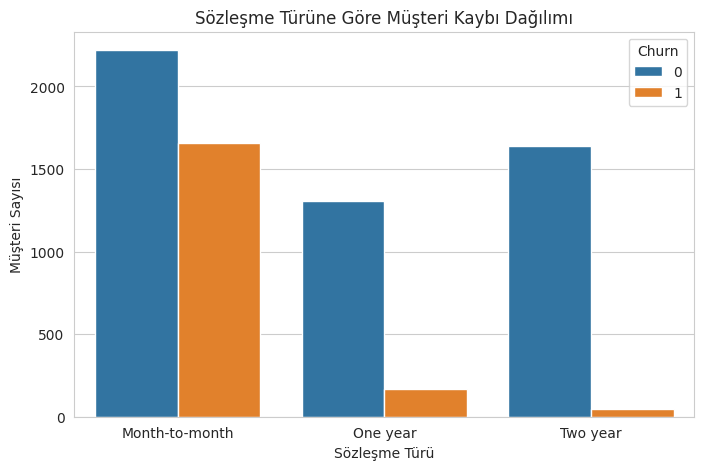

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Sözleşme Türüne Göre Müşteri Kaybı Dağılımı')
plt.xlabel('Sözleşme Türü')
plt.ylabel('Müşteri Sayısı')
plt.show()

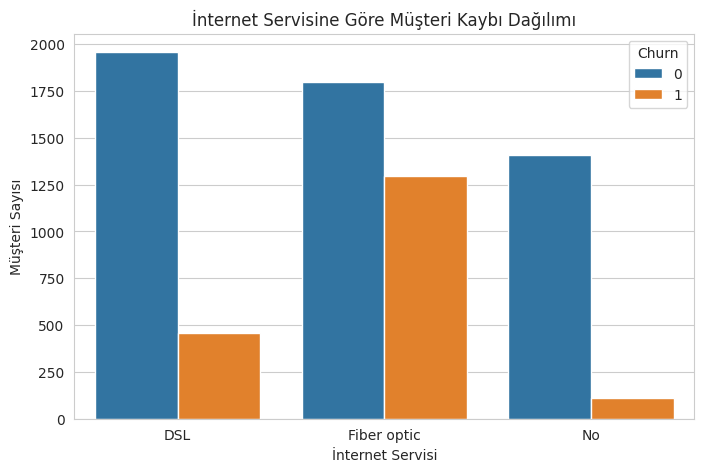

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('İnternet Servisine Göre Müşteri Kaybı Dağılımı')
plt.xlabel('İnternet Servisi')
plt.ylabel('Müşteri Sayısı')
plt.show()

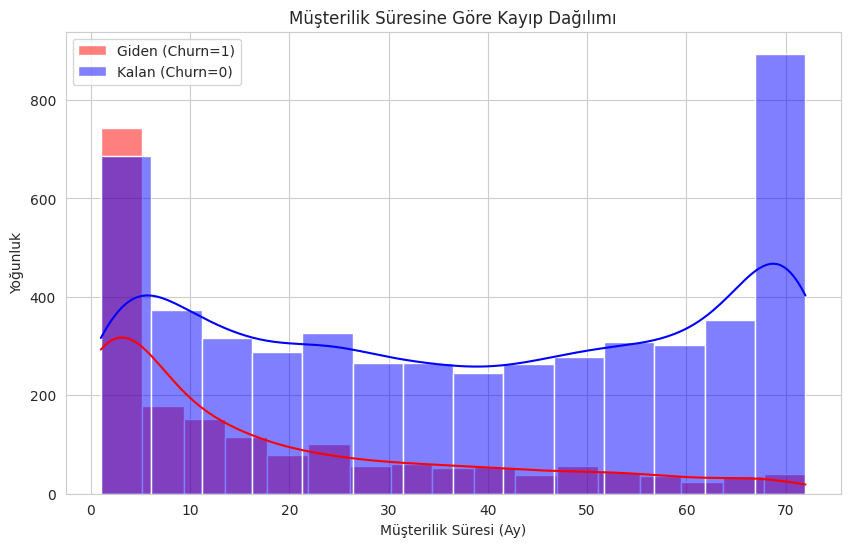

In [ ]:
plt.figure(figsize=(10, 6))

# Giden müşterilerin (Churn=1) 'tenure' dağılımı
sns.histplot(df[df['Churn'] == 1]['tenure'], color='red', label='Giden (Churn=1)', kde=True)

# Kalan müşterilerin (Churn=0) 'tenure' dağılımı
sns.histplot(df[df['Churn'] == 0]['tenure'], color='blue', label='Kalan (Churn=0)', kde=True)

plt.title('Müşterilik Süresine Göre Kayıp Dağılımı')
plt.xlabel('Müşterilik Süresi (Ay)')
plt.ylabel('Yoğunluk')
plt.legend()
plt.show()

In [ ]:
# customerID sütununu modelleme için kullanmayacağız.
df = df.drop('customerID', axis=1)
print("customerID sütunu çıkarıldı.")

customerID sütunu çıkarıldı.


In [ ]:
# 'object' (metin) tipindeki tüm sütunları otomatik olarak seç ve one-hot encoding uygula
# 'drop_first=True' tuzağından kaçınmamızı sağlar (dummy variable trap)
df_processed = pd.get_dummies(df, drop_first=True)

# Yeni veri setimizin ilk 5 satırına bakalım
print("\nVeri ön işleme sonrası (get_dummies):")
df_processed.head()


Veri ön işleme sonrası (get_dummies):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# --- Adım 5.1: X ve y'yi Ayırma ---
# y (hedef) 'Churn' sütunudur.
# X (özellikler) 'Churn' dışındaki her şeydir.
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']


# --- Adım 5.2: Eğitim ve Test Seti Olarak Ayırma ---
# test_size=0.2 (%20 test, %80 eğitim)
# random_state=42: Sonuçların tekrarlanabilir olması için.
# stratify=y: Dengesiz veri setimizde (73% '0', 27% '1')
#              bu oranın hem eğitim hem de test setinde korunmasını sağlar. ÇOK ÖNEMLİ.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- Adım 5.3: Veri Ölçeklendirme ---
# Sadece sayısal ve sürekli olan sütunları ölçeklendireceğiz.
# 0/1 olan dummy/SeniorCitizen sütunlarına dokunmuyoruz.

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Scaler'ı SADECE X_train üzerinde eğitiyoruz (fit_transform)
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# X_test'i, X_train'den öğrendiğimiz ortalama/std ile dönüştürüyoruz (transform)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# --- Adım 5.4: Modeli Eğitme (Lojistik Regresyon) ---
# Temel modelimizi oluşturuyoruz
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Modeli eğitim verisiyle eğitiyoruz
log_model.fit(X_train, y_train)


print("Model başarıyla eğitildi!")
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Model başarıyla eğitildi!
Eğitim seti boyutu: (5625, 30)
Test seti boyutu: (1407, 30)


Modelin Doğruluk (Accuracy) Oranı: 0.8045
------------------------------------------------------------
Modelin AUC-ROC Skoru: 0.8361
------------------------------------------------------------
Karmaşıklık Matrisi (Confusion Matrix):


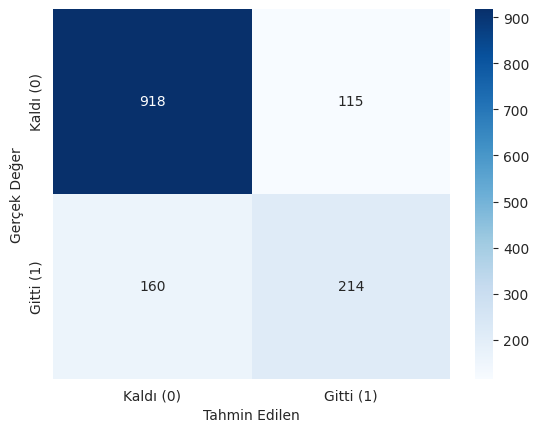

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

   Kaldı (0)       0.85      0.89      0.87      1033
   Gitti (1)       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# --- Adım 6.1: Test Verisi Üzerinde Tahmin Yapma ---
# Modelden X_test'i kullanarak tahmin yapmasını istiyoruz
y_pred = log_model.predict(X_test)

# --- Adım 6.2: Değerlendirme Metrikleri ---

# 1. Accuracy (Doğruluk)
# Dengesiz veride yanıltıcı olabilir ama yine de bakalım.
print(f"Modelin Doğruluk (Accuracy) Oranı: {accuracy_score(y_test, y_pred):.4f}")
print("-" * 60)

# 2. AUC-ROC Skoru
# Giden/Kalan ayrımını ne kadar iyi yaptığı
print(f"Modelin AUC-ROC Skoru: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]):.4f}")
print("-" * 60)

# 3. Confusion Matrix (Karmaşıklık Matrisi)
# Görsel olarak daha iyi anlamak için Seaborn kullanalım
print("Karmaşıklık Matrisi (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kaldı (0)', 'Gitti (1)'],
            yticklabels=['Kaldı (0)', 'Gitti (1)'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

# 4. Classification Report (Sınıflandırma Raporu)
print("Sınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred, target_names=['Kaldı (0)', 'Gitti (1)']))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# --- Adım 7.1: Random Forest Modelini Oluşturma ---
# n_estimators=100: 100 adet karar ağacı kullan
# class_weight='balanced': Bu ÇOK ÖNEMLİ.
#    Veri setimizin "dengesiz" olduğunu (az '1', çok '0') modele söyler.
#    Modelin '1'leri yakalamaya daha fazla odaklanmasını sağlar.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# --- Adım 7.2: Modeli Eğitme ---
print("Random Forest modeli eğitiliyor...")
rf_model.fit(X_train, y_train)
print("Model başarıyla eğitildi!")

# --- Adım 7.3: Yeni Modelin Karnesini Çıkarma ---
print("\n--- Random Forest Modelinin Sonuçları ---")
y_pred_rf = rf_model.predict(X_test)

print(f"Modelin Doğruluk (Accuracy) Oranı: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Modelin AUC-ROC Skoru: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred_rf, target_names=['Kaldı (0)', 'Gitti (1)']))

Random Forest modeli eğitiliyor...
Model başarıyla eğitildi!

--- Random Forest Modelinin Sonuçları ---
Modelin Doğruluk (Accuracy) Oranı: 0.7868
Modelin AUC-ROC Skoru: 0.8166

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

   Kaldı (0)       0.83      0.89      0.86      1033
   Gitti (1)       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# XGBoost'u yüklememiz gerekebilir, Colab'da genelde yüklü gelir.
!pip install xgboost

from xgboost import XGBClassifier

# --- Adım 8.1: Dengesizlik Oranını Hesaplama ---
# Hatırlatma: Kalanlar (0) = 5163, Gidenler (1) = 1869
scale_pos_weight = 5163 / 1869
print(f"XGBoost için scale_pos_weight: {scale_pos_weight:.2f}")


# --- Adım 8.2: XGBoost Modelini Oluşturma ---
# use_label_encoder=False ve eval_metric='logloss' ayarları uyarıları engeller
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,  # Dengesizlik için sihirli parametre
    use_label_encoder=False,
    eval_metric='logloss'
)

# --- Adım 8.3: Modeli Eğitme ---
print("\nXGBoost modeli eğitiliyor...")
xgb_model.fit(X_train, y_train)
print("Model başarıyla eğitildi!")

# --- Adım 8.4: Yeni Modelin Karnesini Çıkarma ---
print("\n--- XGBoost Modelinin Sonuçları ---")
y_pred_xgb = xgb_model.predict(X_test)

print(f"Modelin Doğruluk (Accuracy) Oranı: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Modelin AUC-ROC Skoru: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")
print("\nSınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred_xgb, target_names=['Kaldı (0)', 'Gitti (1)']))

XGBoost için scale_pos_weight: 2.76

XGBoost modeli eğitiliyor...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:25:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model başarıyla eğitildi!

--- XGBoost Modelinin Sonuçları ---
Modelin Doğruluk (Accuracy) Oranı: 0.7527
Modelin AUC-ROC Skoru: 0.8146

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

   Kaldı (0)       0.87      0.78      0.82      1033
   Gitti (1)       0.53      0.68      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



/tmp/ipython-input-1151943637.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


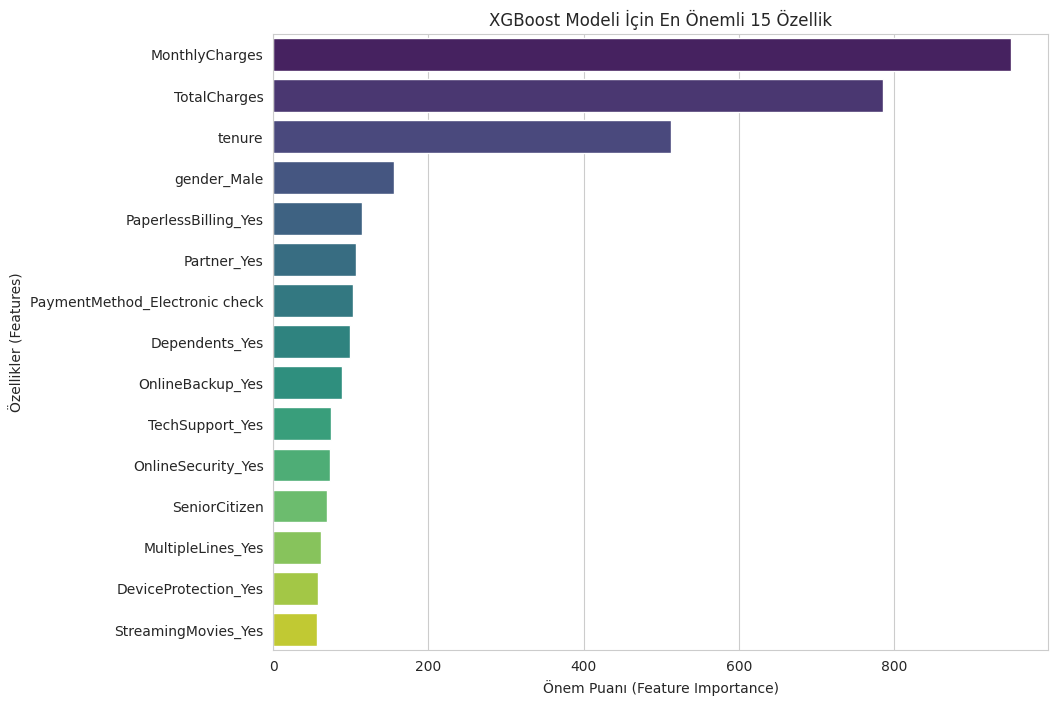

In [ ]:
import operator

# Modelin özellik önemliliği puanlarını bir sözlük (dictionary) olarak alalım
importance_scores = xgb_model.get_booster().get_score(importance_type='weight')

# Bu sözlüğü puanlarına göre büyükten küçüğe sıralayalım
sorted_importance = sorted(importance_scores.items(), key=operator.itemgetter(1), reverse=True)

# İlk 15 en önemli özelliği alalım
top_15_features = sorted_importance[:15]

# Görselleştirelim
plt.figure(figsize=(10, 8))
sns.barplot(
    x=[score for feature, score in top_15_features],
    y=[feature for feature, score in top_15_features],
    palette='viridis'
)
plt.title('XGBoost Modeli İçin En Önemli 15 Özellik')
plt.xlabel('Önem Puanı (Feature Importance)')
plt.ylabel('Özellikler (Features)')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score, make_scorer

# --- Adım 10.1: Temel Modeli ve Parametre Uzayını Tanımlama ---

# Dengesizlik oranını tekrar hesaplayalım (hafızada yoksa diye)
scale_pos_weight = 5163 / 1869

# Ayarları deneyeceğimiz 'temel' modeli oluşturuyoruz (henüz eğitilmemiş)
xgb_base = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Denenecek parametrelerin bir "sözlüğünü" oluşturuyoruz
# Bunlar XGBoost'un en sık ayarlanan parametreleridir
param_dist = {
    'n_estimators': [100, 200, 300, 500],        # Kullanılacak ağaç sayısı
    'max_depth': [3, 5, 7, 10],                 # Ağaçların maksimum derinliği
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Öğrenme hızı
    'subsample': [0.7, 0.8, 0.9, 1.0],          # Her ağaç için kullanılacak veri yüzdesi
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]    # Her ağaç için kullanılacak özellik yüzdesi
}

# --- Adım 10.2: RandomizedSearchCV'ü Yapılandırma ---

# Hangi skora göre "en iyi" modeli seçeceğimizi belirtiyoruz: Recall
# make_scorer kullanarak '1' sınıfının recall'una baktığımızdan emin oluyoruz
recall_scorer = make_scorer(recall_score, pos_label=1)

# RandomizedSearchCV'ü kuruyoruz
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,          # Toplam 50 farklı parametre kombinasyonu dene
    cv=3,               # Her kombinasyonu 3 kez çapraz doğrulama ile test et
    scoring=recall_scorer, # Amacımız 'Recall' skorunu maksimize etmek
    n_jobs=-1,          # Colab'daki tüm işlemcileri kullan (hız için)
    random_state=42,
    verbose=1           # İşlem sırasında bilgi ver
)

# --- Adım 10.3: Aramayı Başlatma (Bu kısım uzun sürecek) ---
print("Hiperparametre optimizasyonu başlıyor... (Bu işlem birkaç dakika sürebilir)")
# Modeli eğitim verisiyle (X_train, y_train) eğitiyoruz
random_search.fit(X_train, y_train)
print("Optimizasyon tamamlandı!")

# --- Adım 10.4: Sonuçları Gösterme ---

print(f"\nEn iyi 'Recall' skoru (Eğitim verisi üzerinden): {random_search.best_score_:.4f}")
print("Bulunan en iyi hiperparametreler:")
print(random_search.best_params_)

# En iyi ayarları bulmuş olan modeli alıyoruz
best_xgb_model = random_search.best_estimator_

# --- Adım 10.5: FİNAL DEĞERLENDİRME (Test Verisi Üzerinde) ---
# Optimize edilmiş modelin ASIL başarısını test verisiyle ölçüyoruz
print("\n--- Optimize Edilmiş Modelin FİNAL TEST SONUÇLARI ---")
y_pred_best_xgb = best_xgb_model.predict(X_test)

print(f"Modelin Doğruluk (Accuracy) Oranı: {accuracy_score(y_test, y_pred_best_xgb):.4f}")
print(f"Modelin AUC-ROC Skoru: {roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1]):.4f}")
print("\nOptimize Edilmiş Sınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred_best_xgb, target_names=['Kaldı (0)', 'Gitti (1)']))

Hiperparametre optimizasyonu başlıyor... (Bu işlem birkaç dakika sürebilir)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Optimizasyon tamamlandı!

En iyi 'Recall' skoru (Eğitim verisi üzerinden): 0.8268
Bulunan en iyi hiperparametreler:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

--- Optimize Edilmiş Modelin FİNAL TEST SONUÇLARI ---
Modelin Doğruluk (Accuracy) Oranı: 0.7164
Modelin AUC-ROC Skoru: 0.8380

Optimize Edilmiş Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

   Kaldı (0)       0.91      0.68      0.78      1033
   Gitti (1)       0.48      0.82      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:37:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# --- Adım 11.1: Veriyi Baştan Temizleyelim (Garantilemek için) ---
# Orijinal (df_processed değil) 'df' değişkenini yeniden oluşturuyoruz.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df.drop('customerID', axis=1)

print("Temel veri seti (df) yeniden oluşturuldu.")

# --- Adım 11.2: YENİ ÖZELLİK 1 (Tenure_Group) ---
# 'tenure' sütununu 3 gruba ayırıyoruz
bins = [0, 12, 48, 72] # Aralıklar: (0-12], (12-48], (48-72]
labels = ['Yeni (0-12 Ay)', 'Orta (13-48 Ay)', 'Sadık (49-72 Ay)']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

print("Yeni özellik 'Tenure_Group' eklendi.")

# --- Adım 11.3: YENİ ÖZELLİK 2 (Services_Count) ---
# Müşterinin 'Evet' dediği ek hizmetleri sayıyoruz
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
# 'Yes' = 1, diğer her şey ('No', 'No phone/internet service') = 0
df_services = df[service_cols].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})
df['Services_Count'] = df_services.sum(axis=1)

print("Yeni özellik 'Services_Count' eklendi.")
print("-" * 40)
print("Yeni özellikler eklendikten sonra veri (ilk 5 satır):")
# Yeni sütunları görmek için .head() kullanalım
df.head()

Temel veri seti (df) yeniden oluşturuldu.
Yeni özellik 'Tenure_Group' eklendi.
Yeni özellik 'Services_Count' eklendi.
----------------------------------------
Yeni özellikler eklendikten sonra veri (ilk 5 satır):


/tmp/ipython-input-3241613209.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_services = df[service_cols].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,Services_Count
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Yeni (0-12 Ay),1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Orta (13-48 Ay),3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yeni (0-12 Ay),3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Orta (13-48 Ay),3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yeni (0-12 Ay),1


In [ ]:
# --- Adım 12.1: Yeni Veri Setini Hazırlama (Dummies, Split, Scale) ---

# One-Hot Encoding ('Tenure_Group'u da otomatik olarak işleyecek)
df_processed_v2 = pd.get_dummies(df, drop_first=True)

# X ve y'yi ayırma
X_v2 = df_processed_v2.drop('Churn', axis=1)
y_v2 = df_processed_v2['Churn']

# Eğitim ve Test Seti
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2
)

# Ölçeklendirme (scaler)
# DİKKAT: 'Services_Count' sütununu da ölçeklendirilecekler listesine ekledik.
cols_to_scale_v2 = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Services_Count']

scaler_v2 = StandardScaler()
X_train_v2[cols_to_scale_v2] = scaler_v2.fit_transform(X_train_v2[cols_to_scale_v2])
X_test_v2[cols_to_scale_v2] = scaler_v2.transform(X_test_v2[cols_to_scale_v2])

print("Zenginleştirilmiş veri (v2) bölündü ve ölçeklendirildi.")
print("-" * 40)

# --- Adım 12.2: Optimize Edilmiş Modeli Yeniden Eğitme ---

# Bir önceki adımdan (random_search) en iyi ayarları alıyoruz
# (Colab hafızasında 'random_search' objesinin durduğunu varsayıyoruz)
try:
    best_params = random_search.best_params_
    print("Önceki optimizasyondan en iyi ayarlar yüklendi.")
except NameError:
    print("HATA: 'random_search' hafızada bulunamadı.")
    print("Lütfen bir önceki 'RandomizedSearchCV' hücresini tekrar çalıştırın.")
    # Eğer hafıza sıfırlandıysa, en iyi ayarları elle giriyoruz:
    best_params = {
        'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3,
        'learning_rate': 0.01, 'colsample_bytree': 0.8
    }

# Dengesizlik oranımızı da ekleyelim
scale_pos_weight = 5163 / 1869
best_params['scale_pos_weight'] = scale_pos_weight

# FİNAL MODELİ (v2) - En iyi ayarlarla ve en iyi veriyle
final_model = XGBClassifier(
    **best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("Final (v2) modeli yeni veriyle eğitiliyor...")
final_model.fit(X_train_v2, y_train_v2)
print("Model başarıyla eğitildi!")
print("-" * 40)

# --- Adım 12.3: FİNAL DEĞERLENDİRME (v2) ---
print("--- Zenginleştirilmiş Veri ile Final Raporu ---")
y_pred_final = final_model.predict(X_test_v2)

print(f"Modelin Doğruluk (Accuracy) Oranı: {accuracy_score(y_test_v2, y_pred_final):.4f}")
print(f"Modelin AUC-ROC Skoru: {roc_auc_score(y_test_v2, final_model.predict_proba(X_test_v2)[:, 1]):.4f}")
print("\nOptimize Edilmiş Sınıflandırma Raporu (v2 - YENİ VERİ):")
print(classification_report(y_test_v2, y_pred_final, target_names=['Kaldı (0)', 'Gitti (1)']))

Zenginleştirilmiş veri (v2) bölündü ve ölçeklendirildi.
----------------------------------------
Önceki optimizasyondan en iyi ayarlar yüklendi.
Final (v2) modeli yeni veriyle eğitiliyor...
Model başarıyla eğitildi!
----------------------------------------
--- Zenginleştirilmiş Veri ile Final Raporu ---
Modelin Doğruluk (Accuracy) Oranı: 0.7178
Modelin AUC-ROC Skoru: 0.8381

Optimize Edilmiş Sınıflandırma Raporu (v2 - YENİ VERİ):
              precision    recall  f1-score   support

   Kaldı (0)       0.91      0.68      0.78      1033
   Gitti (1)       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:46:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
